In [2]:
pip install tensorflow-datasets tensorflow matplotlib pandas numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [4]:
tfds.disable_progress_bar()

In [7]:
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
train_ds, val_ds, test_ds = dataset['train'], dataset['validation'], dataset['test']

In [8]:
print("Dataset Name:", info.name)

Dataset Name: oxford_flowers102


In [9]:
print("Number of classes:", info.features['label'].num_classes)

Number of classes: 102


In [10]:
print("Total examples:")
print(" - Train:", info.splits['train'].num_examples)
print(" - Validation:", info.splits['validation'].num_examples)
print(" - Test:", info.splits['test'].num_examples)

Total examples:
 - Train: 1020
 - Validation: 1020
 - Test: 6149


In [11]:
label_names = info.features['label'].names

In [49]:
label_names = info.features['label'].names

In [14]:
res_df = pd.DataFrame(image_shapes, columns=['Height', 'Width', 'Channels'])
print("Image resolution statistics (100 samples):")
print(res_df.describe())

Image resolution statistics (100 samples):
           Height       Width  Channels
count  100.000000  100.000000     100.0
mean   541.670000  623.080000       3.0
std     78.265806  106.863046       0.0
min    500.000000  500.000000       3.0
25%    500.000000  500.000000       3.0
50%    500.000000  660.500000       3.0
75%    544.250000  726.750000       3.0
max    883.000000  825.000000       3.0


In [16]:
print(f"Number of classes: {info.features['label'].num_classes}")

Number of classes: 102


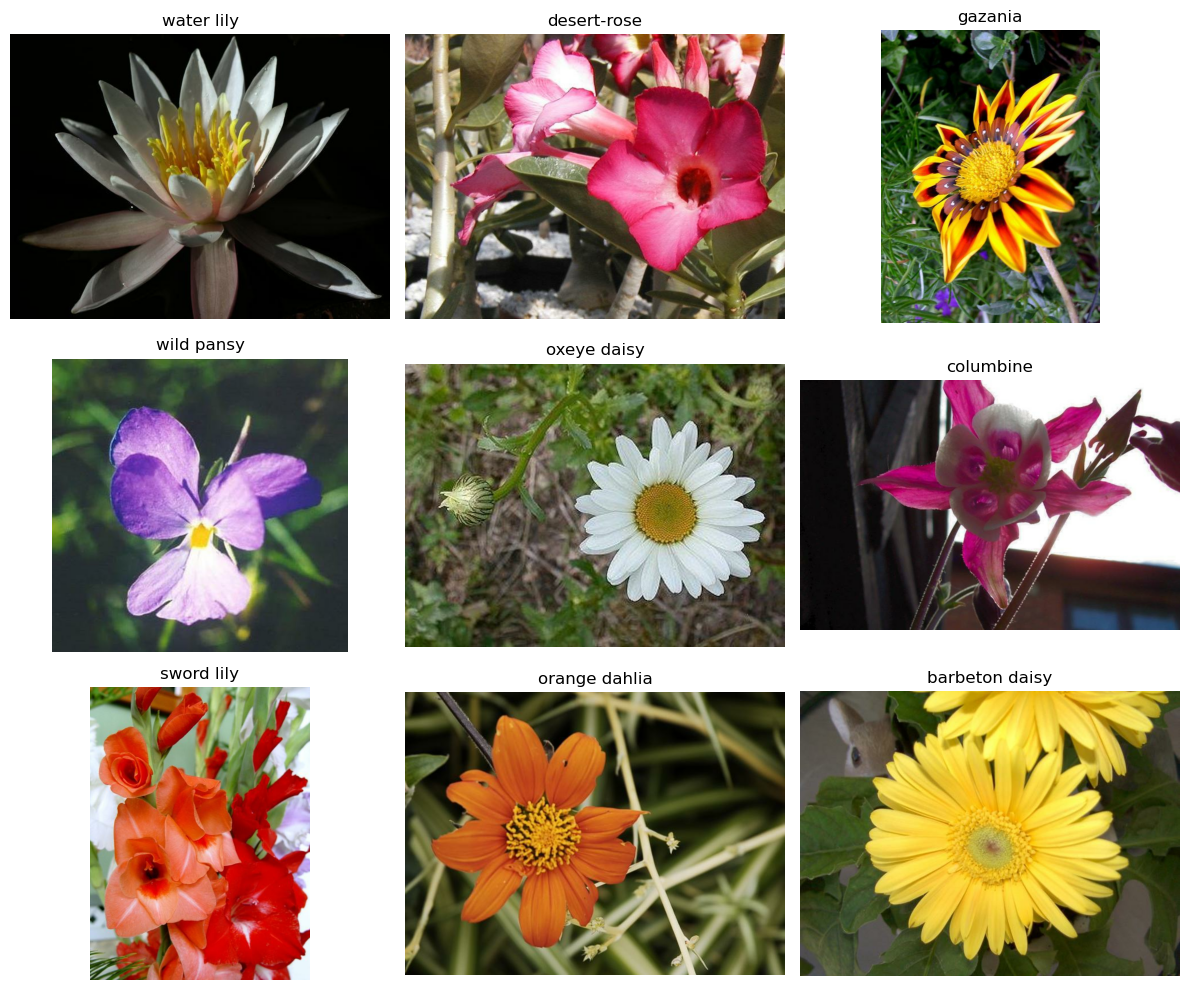

In [36]:
plt.figure(figsize=(12, 10))
for i, (img, lbl) in enumerate(train_ds.take(9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_names[lbl.numpy()])
plt.tight_layout()
plt.show()

In [29]:
OUTPUT_DIR = Path("images_and_statistics")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

In [30]:
folder_name = "images_and_statistics"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"✅ Folder '{folder_name}' created.")
else:
    print(f"📁 Folder '{folder_name}' already exists.")


📁 Folder 'images_and_statistics' already exists.


In [31]:
plt.savefig("images_and_statistics/sample_plot.png")

<Figure size 640x480 with 0 Axes>

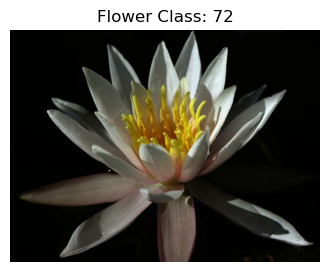

In [34]:
ds = tfds.load('oxford_flowers102', split='train', as_supervised=True)
os.makedirs("images_and_statistics", exist_ok=True)
for image, label in ds.take(1):
    plt.figure(figsize=(4, 4))         
    plt.imshow(image.numpy())          
    plt.axis('off')
    plt.title(f"Flower Class: {label.numpy()}")
    plt.savefig("images_and_statistics/sample_flower.png")
    plt.show()

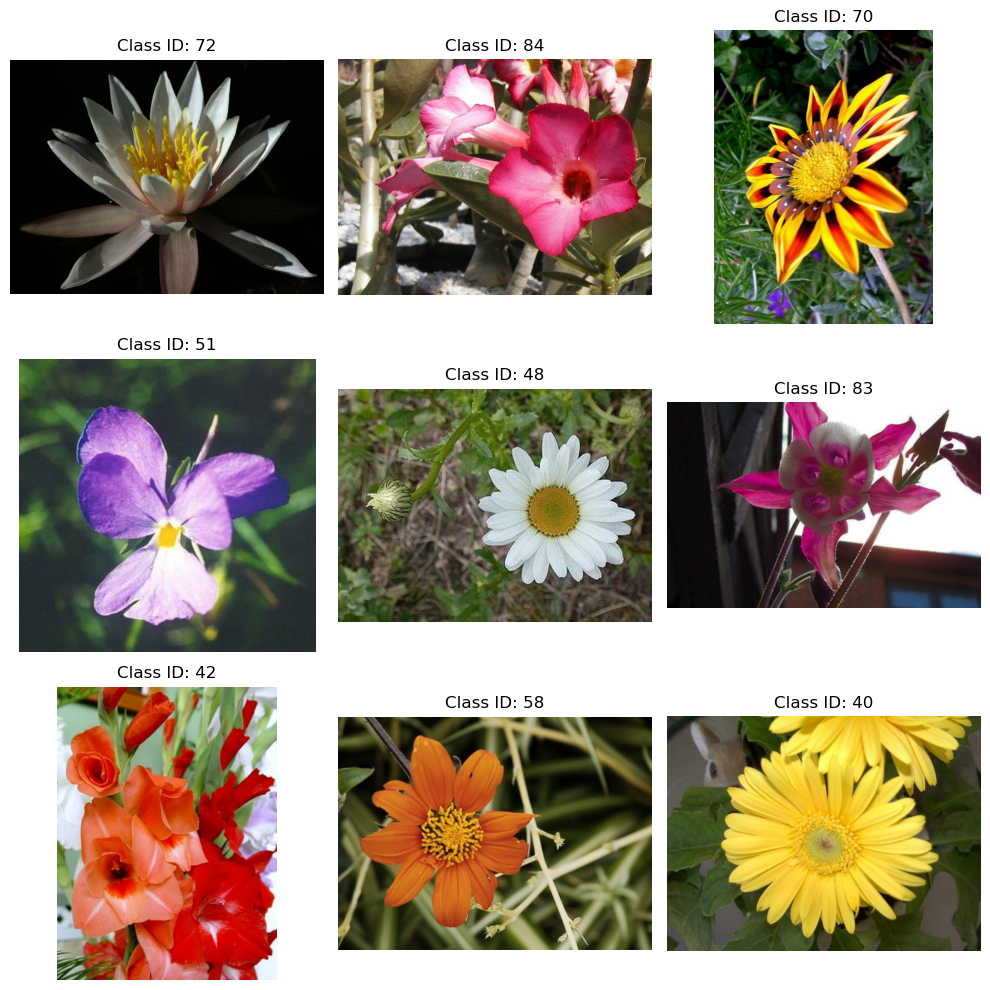

In [35]:
os.makedirs("images_and_statistics", exist_ok=True)
dataset = tfds.load('oxford_flowers102', split='train', as_supervised=True)
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(dataset.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(f"Class ID: {label.numpy()}")
    plt.axis("off")
plt.tight_layout()
plt.savefig("images_and_statistics/flower_grid.png")
plt.show()

In [44]:
output_dir = "images_and_statistics"
os.makedirs(output_dir, exist_ok=True)
dataset = tfds.load("oxford_flowers102", split="train", as_supervised=True)
image_sizes = []
for image, label in dataset.take(200):  # Analyze first 200 images
    h, w = image.shape[0], image.shape[1]
    image_sizes.append((h, w))

In [45]:
df_sizes = pd.DataFrame(image_sizes, columns=["Height", "Width"])
csv_path = os.path.join(output_dir, "image_size_stats.csv")
df_sizes.to_csv(csv_path, index=False)

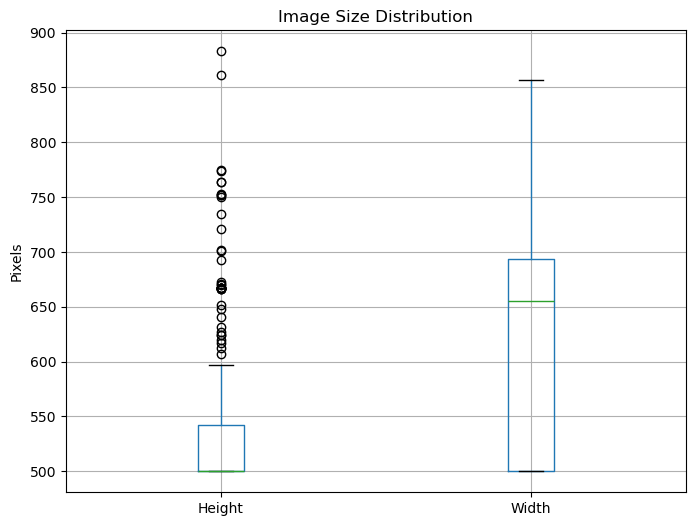

In [46]:
plt.figure(figsize=(8, 6))
df_sizes.boxplot()
plt.title("Image Size Distribution")
plt.ylabel("Pixels")
plt.grid(True)
boxplot_path = os.path.join(output_dir, "image_size_boxplot.png")
plt.savefig(boxplot_path)
plt.show()

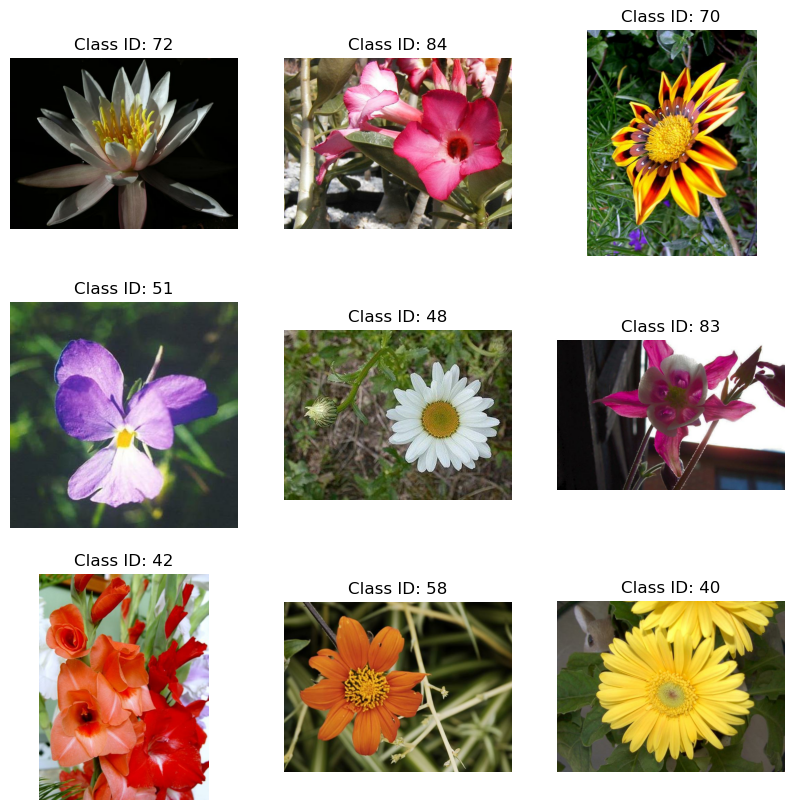

In [47]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(dataset.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(f"Class ID: {label.numpy()}")
    plt.axis("off")

In [1]:
import tensorflow_datasets as tfds
import pandas as pd

# Load dataset (as supervised gives (image, label) tuple)
ds, ds_info = tfds.load("oxford_flowers102", split='train', as_supervised=True, with_info=True)

# Sample 200 images and collect dimensions
image_sizes = []

for i, (image, label) in enumerate(ds.take(200)):
    height = image.shape[0]
    width = image.shape[1]
    image_sizes.append({'Index': i+1, 'Height': height, 'Width': width})

# Convert to DataFrame
image_sizes_df = pd.DataFrame(image_sizes)

# Save to CSV
image_sizes_df.to_csv('images_and_statistics/flower_image_stats.csv', index=False)


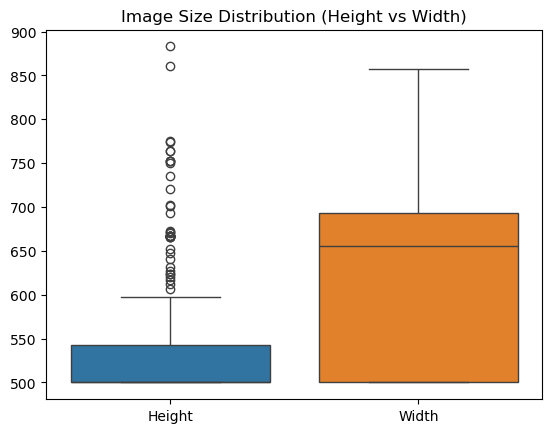

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('images_and_statistics/flower_image_stats.csv')
sns.boxplot(data=df[['Height', 'Width']])
plt.title("Image Size Distribution (Height vs Width)")
plt.savefig("images_and_statistics/image_size_boxplot.png")